# House Prices Project

This project is a competition on Kaggle. The description of the competition is as follows: 
'With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.'

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Exploration

In [2]:
pd.options.display.max_columns = None
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
del df["Id"]
print(len(df.columns))

80


Text(0.5, 1, 'Correlation Heatmap')

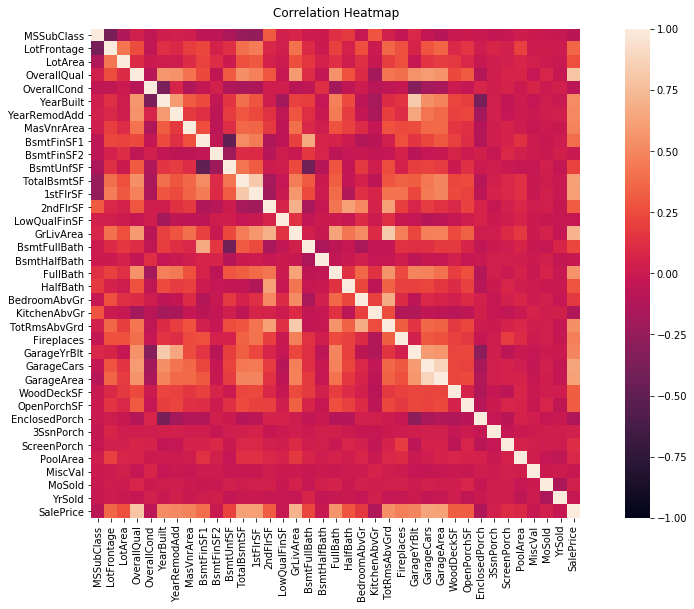

In [4]:
newdf = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(newdf.corr(), vmin=-1, vmax=1, square=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [5]:
corr = dict()
del newdf["SalePrice"]

for column in newdf.columns:
    corr[column] = df["SalePrice"].corr(newdf[column])

for w in sorted(corr, key=corr.get, reverse=True):
    print(w, corr[w])
    #print("{}: {}".format(column, newdf["SalePrice"].corr(newdf[column])))

OverallQual 0.7909816005838048
GrLivArea 0.7086244776126522
GarageCars 0.6404091972583531
GarageArea 0.6234314389183617
TotalBsmtSF 0.6135805515591956
1stFlrSF 0.6058521846919147
FullBath 0.5606637627484456
TotRmsAbvGrd 0.5337231555820284
YearBuilt 0.5228973328794969
YearRemodAdd 0.5071009671113864
GarageYrBlt 0.4863616774878608
MasVnrArea 0.477493047095716
Fireplaces 0.46692883675152763
BsmtFinSF1 0.38641980624215316
LotFrontage 0.3517990965706781
WoodDeckSF 0.3244134445681295
2ndFlrSF 0.3193338028320677
OpenPorchSF 0.31585622711605543
HalfBath 0.2841076755947829
LotArea 0.26384335387140573
BsmtFullBath 0.22712223313149404
BsmtUnfSF 0.21447910554696895
BedroomAbvGr 0.16821315430073996
ScreenPorch 0.1114465711429111
PoolArea 0.09240354949187317
MoSold 0.04643224522381939
3SsnPorch 0.04458366533574845
BsmtFinSF2 -0.011378121450215136
BsmtHalfBath -0.01684415429735902
MiscVal -0.021189579640303245
LowQualFinSF -0.02560613000067959
YrSold -0.02892258516873034
OverallCond -0.07785589404867

The numerical variables that correlate the most with SalePrice are OverallQual (which rates the overall material and finish of the house), and GrLivArea (which is the amount of square feet of the living room). Let's make a scatterplot of SalePrice and respectively these two variables.

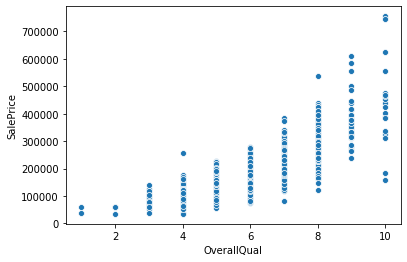

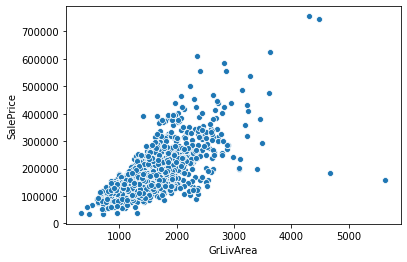

In [6]:
sns.scatterplot(data=df, x="OverallQual", y="SalePrice")
plt.show()

sns.scatterplot(data=df, x="GrLivArea", y='SalePrice')
plt.show()

In [7]:
print(df.select_dtypes(include="object").columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Preprocessing

I will fill in the missing values, preprocess the categorical values and divide the data into a training set and validation set

In [8]:
#missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(50)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [9]:
#filling missing values
df = df.drop(columns = ["PoolQC", "MiscFeature", "Alley", "Fence"])
df["FireplaceQu"] = df["FireplaceQu"].fillna("NoFireplace")
df["GarageFinish"] = df["GarageFinish"].fillna("NoGarage")
df["GarageType"] = df["GarageType"].fillna("NoGarage")
df["GarageCond"] = df["GarageCond"].fillna("NoGarage")
df["GarageFinish"] = df["GarageFinish"].fillna("NoGarage")
df["GarageQual"] = df["GarageQual"].fillna("NoGarage")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NoBasement")
df["BsmtExposure"] = df["BsmtExposure"].fillna("NoBasement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NoBasement")
df["BsmtCond"] = df["BsmtCond"].fillna("NoBasement")
df["BsmtQual"] = df["BsmtQual"].fillna("NoBasement")
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna("None")
df["Electrical"] = df["Electrical"].fillna("SBrkr")

#mapping ordinal variables
df["LotShape"] = df["LotShape"].map({"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3})
df["Utilities"] = df["Utilities"].map({"ELO": 0, "NoSeWa": 1, "NoSewr": 2, "AllPub": 3})
df["LandSlope"] = df["LandSlope"].map({"Gtl": 0, "Mod": 1, "Sev": 2})
df["ExterQual"] = df["ExterQual"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})
df["ExterCond"] = df["ExterCond"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})
df["BsmtQual"] = df["BsmtQual"].map({"NoBasement": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
df["BsmtCond"] = df["BsmtCond"].map({"NoBasement": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
df["BsmtExposure"] = df["BsmtExposure"].map({"NoBasement": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4})
df["BsmtFinType1"] = df["BsmtFinType1"].map({"NoBasement": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6})
df["BsmtFinType2"] = df["BsmtFinType2"].map({"NoBasement": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6})
df["HeatingQC"] = df["HeatingQC"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})
df["CentralAir"] = df["CentralAir"].map({"N": 0, "Y": 1})
df["KitchenQual"] = df["KitchenQual"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})
df["Functional"] = df["Functional"].map({"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7})
df["FireplaceQu"] = df["FireplaceQu"].map({"NoFireplace": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
df["GarageQual"] = df["GarageQual"].map({"NoGarage": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
df["GarageCond"] = df["GarageCond"].map({"NoGarage": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
df["GarageFinish"] = df["GarageFinish"].map({"NoGarage": 0, "Unf": 1, "RFn": 2, "Fin": 3})

#one hot encoding of non-ordinal categorical variables
df = pd.get_dummies(df)

#dividing data into training set and validation set
X = df
y = df["SalePrice"]
del X["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

#imputing mean value for missing numerical variables
X_train["LotFrontage"] = X_train["LotFrontage"].fillna(X_train["LotFrontage"].mean())
X_valid["LotFrontage"] = X_valid["LotFrontage"].fillna(X_train["LotFrontage"].mean())
X_train["GarageYrBlt"] = X_train["GarageYrBlt"].fillna(X_train["GarageYrBlt"].mean())
X_valid["GarageYrBlt"] = X_valid["GarageYrBlt"].fillna(X_train["GarageYrBlt"].mean())

#checking if values are still missing
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing.head(10)

,Total,Percent
SaleCondition_Partial,0,0.0
MasVnrArea_32.0,0,0.0
MasVnrType_None,0,0.0
MasVnrType_Stone,0,0.0
MasVnrArea_0.0,0,0.0
MasVnrArea_1.0,0,0.0
MasVnrArea_11.0,0,0.0
MasVnrArea_14.0,0,0.0
MasVnrArea_16.0,0,0.0
MasVnrArea_18.0,0,0.0


## Model Building

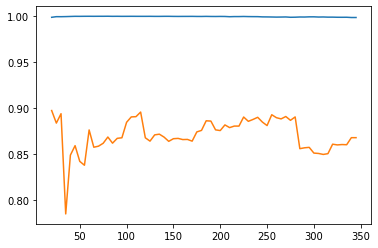

In [10]:
no_of_features = []
r_squared_train = []
r_squared_valid = []

for k in range(20, 350, 5):
    selector = SelectKBest(f_regression, k=k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_valid_transformed = selector.transform(X_valid)
    regressor = XGBRegressor()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_valid.append(regressor.score(X_valid_transformed, y_valid))

sns.lineplot(x=no_of_features, y=r_squared_train)
sns.lineplot(x=no_of_features, y=r_squared_valid)
plt.show()

I see that the predictive power of the model doesn't improve when there are more than 20 features in the model. For that reason, I will select the 20 best features for the model.

In [17]:
selector = SelectKBest(f_regression, k=20)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_valid_transformed = selector.transform(X_valid)
column_names = X_train.columns
print(column_names[selector.get_support()])

def regression_model(model):
    model.fit(X_train_transformed, y_train)
    train_score = model.score(X_train_transformed, y_train)
    test_score = model.score(X_valid_transformed, y_valid)
    return model, train_score, test_score

model_performance = pd.DataFrame(columns = ["Model", "Training R2 Score", "Test R2 Score"])
regressors = []
models_to_evaluate = [LinearRegression(), Ridge(), SVR(), RandomForestRegressor(), XGBRegressor()]
for model in models_to_evaluate:
    regressor, train_score, test_score = regression_model(model)
    model_performance = model_performance.append({"Model": model, "Training R2 Score": train_score, "Test R2 Score": test_score}, ignore_index=True)
model_performance

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'Neighborhood_NridgHt', 'Foundation_PConc'],
      dtype='object')


,Model,Training R2 Score,Test R2 Score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.789949,0.818346
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.789946,0.818438
2,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.048078,-0.015688
3,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.976064,0.898120
4,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.998702,0.897445


The RandomForestRegressor and XGBRegressor have the best predictive model with an R squared of almost 90!